# Algoritmo Genético Binario
___

**Objetivo:** Minimizar x^2, dado que -10<x<10.

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Funções de apoio

In [199]:
#Conversão de Bits para Inteiro
def binary_to_decimal(binary):
    """This function converts a binary number to a decimal number.

    Args:
        binary (_type_): _description_

    Returns:
        int: The decimal number.
    """    
    return sum(
        [
            int(binary[-i-1])*2**i for i in range(len(binary))
        ]
    )

#Função de Geração da População Inicial 
def populacaoBinaria(L,bits,xmin,xmax):
    #População Inicial Aleatoria Binaria
    temp = np.round(np.random.rand(L,bits))    
    Po_Binario = temp.astype('int')
    I = []
    Po = []
    for i in range(0,L):
        x =  int(binary_to_decimal(Po_Binario[i,:]))
        I.append(x)
        y = xmin + x*(xmax-xmin)/(2**bits - 1)
        Po.append(y)
    return Po,Po_Binario
    #População Inicial Aleatoria Transformada a Decimal  
     
#Função do Fitness
def fitness(x):
    fit = x**2
    return fit

#Avaliação do Fitnes da População
def avaliacao(Po):
    Fitness = []
    for i in range(0,L):
        Fitness.append(100-fitness(Po[i])) #Tornanndo um problema de maximização
    return Fitness

#Seleção dos Individuos para Reprodução
def selecao(Po,Po_Binario,bits,Fitness):
    #Seleção usando o método da roleta
    L = len(Po)
    Probabilidade = np.array(Fitness)/sum(Fitness)
    Prob_Acumulativa = Probabilidade.cumsum()
    #indice_Sel = np.zeros((1,L))
    indice_Sel = []
    for i in range(0,L):
        roleta = np.random.rand()
        z = filter(lambda r:r>roleta, Prob_Acumulativa)
        T = len(list(z))
        indice_Sel.append(L-T)
    Ps_Binario = np.zeros((L,bits))
    Ps = np.zeros((L,1))
    for i in range(0,L):
        Ps[i]=Po[indice_Sel[i]]
        Ps_Binario[i,:] = Po_Binario[indice_Sel[i],:]
    return Ps, Ps_Binario

#Operação de Cruzamento
def cruzamento(Ps_Binario,L,bits,probc):
    #Operador de Cruzamento
    Pc_Binario = np.zeros((L,bits))
    for i in range(0,int(L/2)):                  #Seleciona (L/2) pares
        r = np.random.rand()                     #Geração de um número aleatorio   
        if r <= probc:                           #Se o numero aleatorio for menor do que probc então se realiza o cruzamento
            alfa = np.random.randint(1,bits-1)   #Ponto de Cruzamento            
            P1 = Ps_Binario[2*i-1+1,:]           #Pai 1
            P2 = Ps_Binario[2*i+1,:]             #Pai 2            
            Pc_Binario[2*i-1+1,:] = np.concatenate((P1[0:alfa+1], P2[alfa+1:bits]))   #Filho 1
            Pc_Binario[2*i+1,:]   = np.concatenate((P2[0:alfa+1], P1[alfa+1:bits]))   #Filho 2  
        else:
            alfa = 0
            Pc_Binario[2*i-1+1,:] = Ps_Binario[2*i-1+1,:]  #Copia o Pai 1
            Pc_Binario[2*i+1,:]   = Ps_Binario[2*i+1,:]    #Copia o Pai 2 
    return Pc_Binario       
    
#Operador de Mutação
def mutacao(Pc_Binario,bits,L,loop,probm,xmin,xmax):
    Pm_Binario = Pc_Binario
    for i in range(0,L):    
        for j in range(0,bits):
            r = np.random.rand()                     #Geração de um número aleatorio   
            if r <= probm:                           #Se o numero aleatorio for menor do que probm então se realiza a mutação
                if (Pc_Binario[i][j] == 1):
                    Pm_Binario[i][j] = 0
                elif (Pc_Binario[i][j] == 0):
                    Pm_Binario[i][j] = 1                 
    #Avaliação da População após a Mutação  
    Fitness_Final = []
    Pfinal = []
    for i in range(0,L):
        x =  int(binary_to_decimal(Pm_Binario[i,:]))
        y = xmin + x*(xmax-xmin)/(2**bits - 1)
        Pfinal.append(y)
        Fitness_Final.append(100-fitness(y))         
    return Pm_Binario, Fitness_Final,Pfinal


#Operador de Elitismo
def elitismo(Fitness_Inicial,Fitness_Final,loop,Po,Po_Binario,Pm_Binario,Pfinal):
    
    #Substituindo o pior da População Inicial com o Melhor da População Final
    Bad_Inicial = np.argmin(Fitness_Inicial)
    Best_Final = np.argmax(Fitness_Final)
    
    if Fitness_Final[Best_Final] > Fitness_Inicial[Bad_Inicial]:
        Po[Bad_Inicial] = Pfinal[Best_Final]
        Po_Binario[Bad_Inicial,:] = Pm_Binario[Best_Final,:]
        Fitness_Inicial = avaliacao(Po) 
    return Po,Po_Binario,Fitness_Inicial



[0, 20, 90, 102]

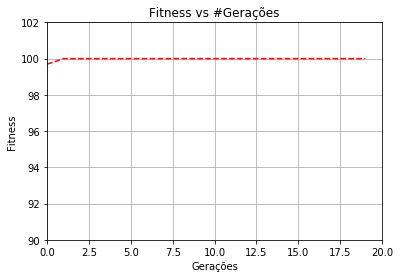

In [200]:
# **************************************************************    
# PROGRAMA PRINCIPAL
#np.random.seed(500)
xmin = -10                                             #Valor mínimo
xmax = 10                                               #Valor máximo 
L = 10                                                   #Tamanho da população
probc = 0.8                                             #Probabilidade de Cruzamento
probm = 0.05                                            #Probabilidade de mutação 
geracoes = 20                                            #Numero de Gerações
bits = 15                                                #Número de Bits para a representação do número   
Po,Po_Binario = populacaoBinaria(L,bits,xmin,xmax)      #População inicial
Fitness_Inicial = avaliacao(Po)                         #Avaliação do fitness da população inicial
linha = []
out = []
SolucaoX = []
#ALGORITMO GENETICO
for loop in range(0,geracoes):
    out.append(max(Fitness_Inicial))
    linha.append(loop)
    indice_Best_Solucao = np.argmax(Fitness_Inicial)
    SolucaoX.append(Po[indice_Best_Solucao])
    #Operador de Seleção Roleta
    Ps, Ps_Binario = selecao(Po,Po_Binario,bits,Fitness_Inicial)    
    #Operador de Cruzamento
    Pc_Binario = cruzamento(Ps_Binario,L,bits,probc)
    #Operador de Mutação
    Pm_Binario,Fitness_Final,Pfinal = mutacao(Pc_Binario,bits,L,loop,probm,xmin,xmax)       
    #operador de Elitismo
    Po,Po_Binario,Fitness_Inicial = elitismo(Fitness_Inicial,Fitness_Final,loop,Po,Po_Binario,Pm_Binario,Pfinal)
    

#Solução Final
plt.plot(linha, out, 'r--')
plt.title("Fitness vs #Gerações")
plt.xlabel("Gerações")
plt.ylabel("Fitness")
plt.grid("on")    
plt.axis([0, geracoes, 90, 102])    
    

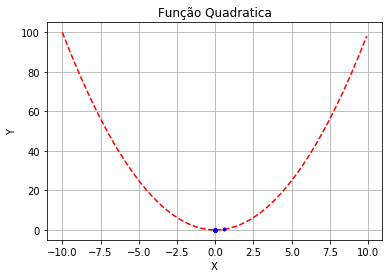

In [201]:
#Análise da Procura de Soluções
in_array = np.arange(xmin,xmax,0.1)
out_array = []   
lista = range(len(in_array))
for i in lista: 
    out_array.append(in_array[i]**2) 

SolucaoY = []    
lista2 = range(len(SolucaoX))    
for i in lista2:
    SolucaoY.append(SolucaoX[i]**2)    
  
    
#Figura    
plt.plot(in_array, out_array, 'r--',SolucaoX,SolucaoY,'b.')  
plt.title("Função Quadratica")  
plt.xlabel("X")  
plt.ylabel("Y")  
plt.grid()
plt.show()  

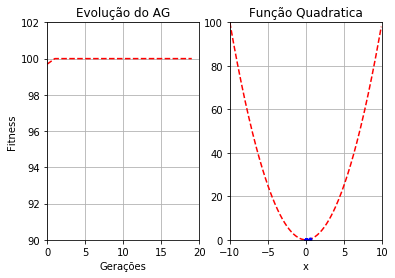

In [202]:
#Juntando Figuras 
plt.subplot(1,2,1)
plt.plot(linha, out, 'r--')
plt.axis([0, geracoes, 90, 102]) 
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.title('Evolução do AG')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(in_array, out_array, 'r--',SolucaoX,SolucaoY,'b.')  
plt.axis([xmin,xmax , 0, 100]) 
plt.xlabel('x')
plt.title('Função Quadratica')
plt.grid('on')


In [203]:
#A melhor solução a cada geração
SolucaoX

[0.5520798364207895,
 -0.0149540696432382,
 -0.0149540696432382,
 -0.0149540696432382,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.003967406231879522,
 -0.0015259254737998162,
 -0.0015259254737998162,
 -0.0015259254737998162,
 -0.0015259254737998162,
 -0.00030518509475996325,
 -0.00030518509475996325,
 -0.00030518509475996325,
 -0.00030518509475996325]